## Assignment 2
# Linear regression
Linear regression is one of the most fundamental and widely used supervised learning algorithms in machine learning and statistics. It models the relationship between a dependent variable (target) and one or more independent variables (features) using a linear equatio

In [71]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import os

### Data Loading

In [72]:
dir_path = "./regression-dataset/"
assert (
    os.path.exists(dir_path)
), "could not locate the required data files. Please ensure the dir_path variable is set to the correct directory where the input files are stored."

In [73]:
X_train = pd.read_csv(os.path.join(dir_path,"train_inputs.csv"), header=None)
y_train = pd.read_csv(os.path.join(dir_path, "train_targets.csv"), header=None)
X_test = pd.read_csv(os.path.join(dir_path, "test_inputs.csv"), header=None)
y_test = pd.read_csv(os.path.join(dir_path, "test_targets.csv"), header=None)

In [74]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}\n")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (200, 2)
y_train Shape: (200, 1)

X_test Shape: (100, 2)
y_test Shape: (100, 1)


In [75]:
X_train.head()

,0,1
0,0.266095,0.516330
1,0.211287,0.436032
2,0.509464,0.166131
3,0.755865,0.708364
4,0.136161,0.712133


In [76]:
y_train.head()

,0
0,-0.637080
1,-1.370977
2,-0.145243
3,0.458230
4,1.190616


### EDA

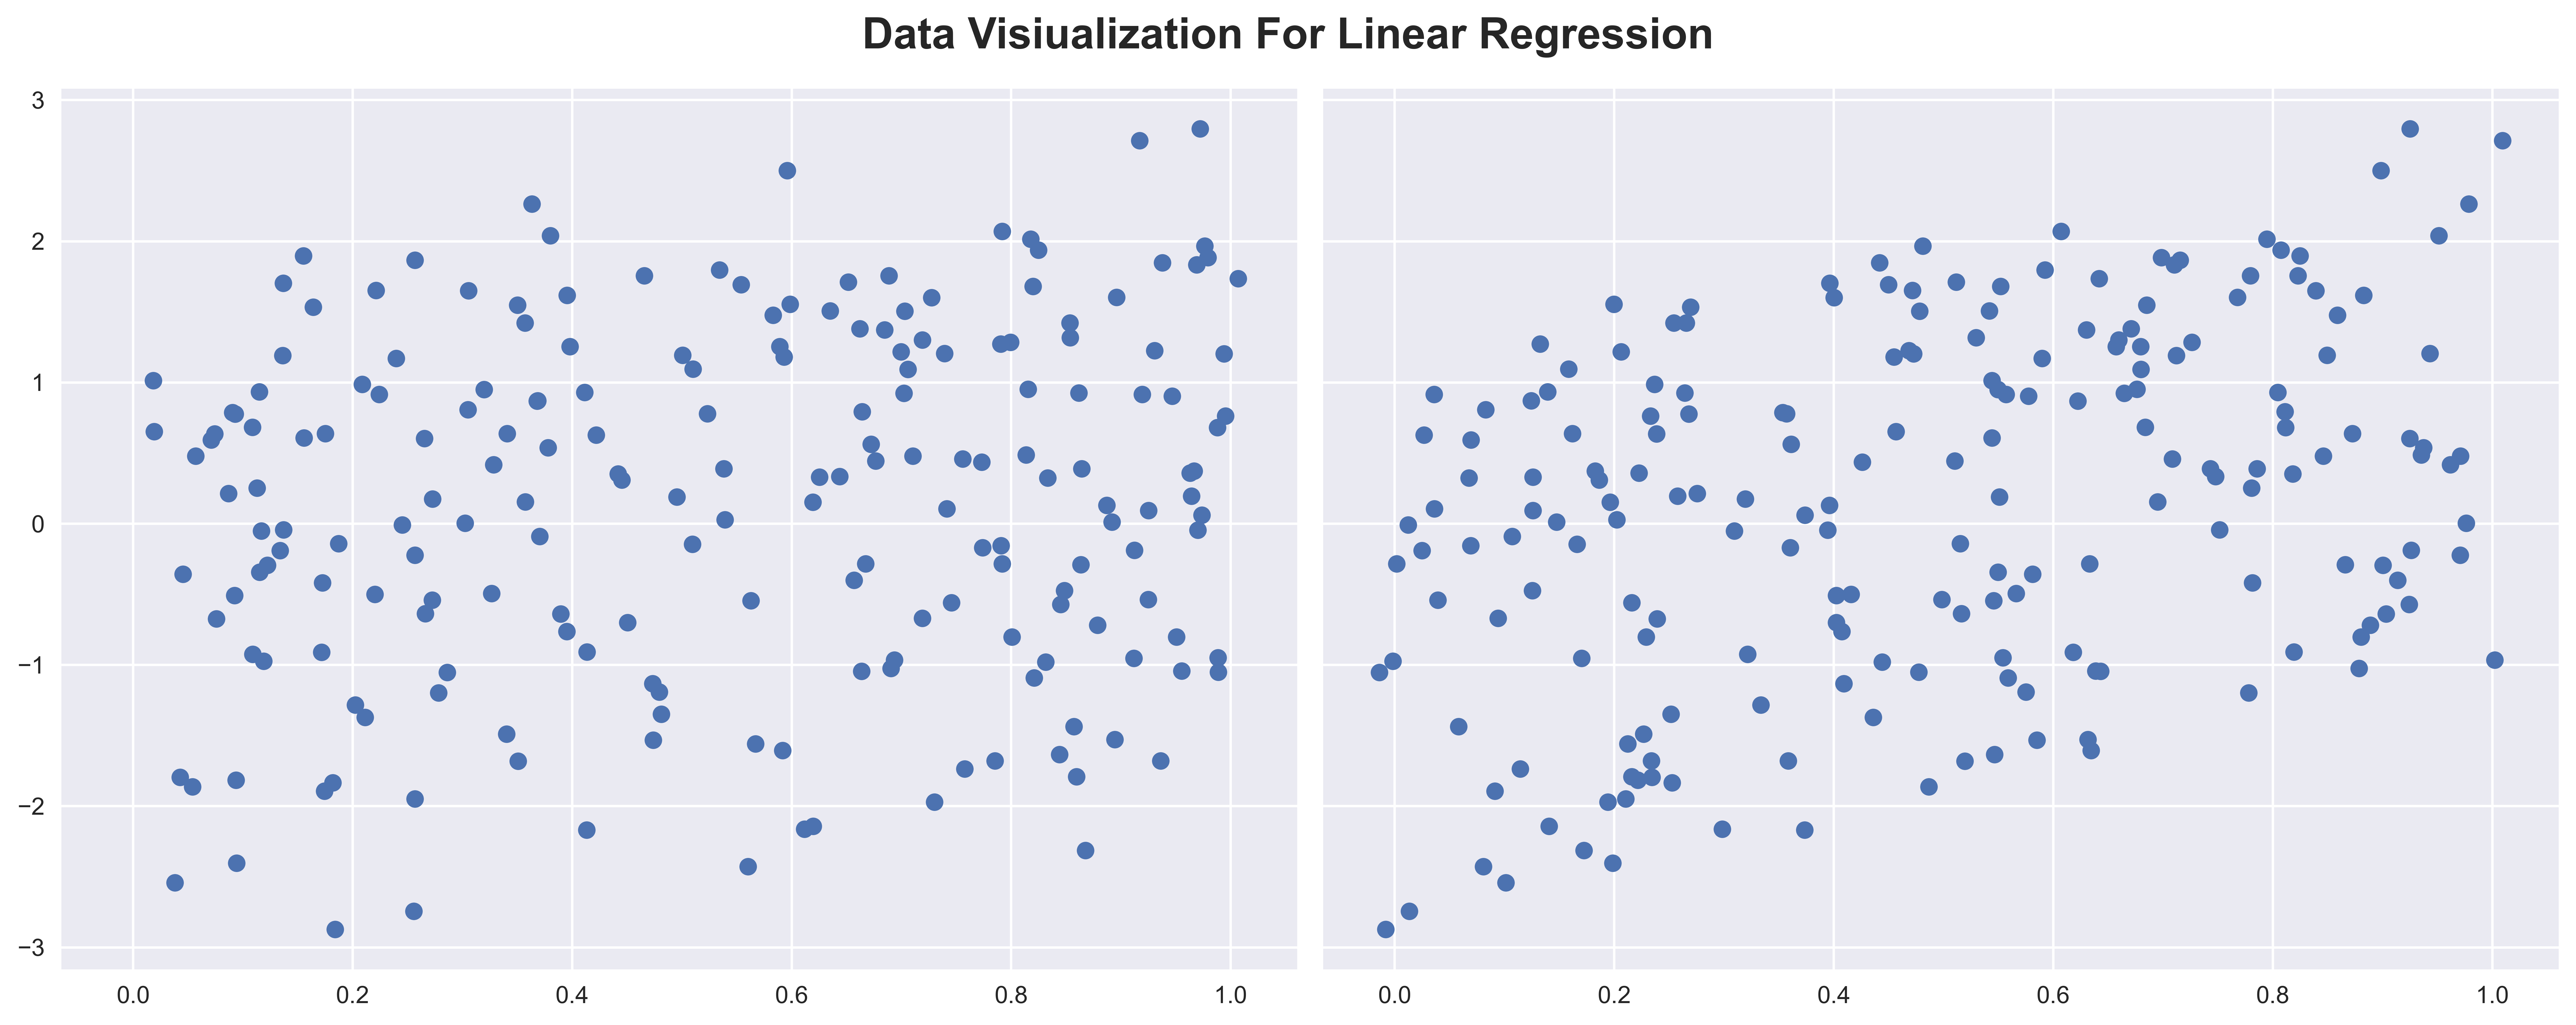

In [77]:
plt.style.use(plt.style.available[11])
fig,ax = plt.subplots(ncols=2,sharex=True,sharey=True)
# Set Appearance
fig.set_size_inches(15,6)
fig.set_dpi(600)
fig.set_tight_layout(tight=True)
fig.suptitle("Data Visiualization For Linear Regression",fontsize=18,fontweight='bold')

ax[0].scatter(X_train[0], y_train[0])
ax[1].scatter(X_train[1], y_train[0])

plt.show()

In [78]:
# Declare HyperParameters
KFOLD= 10
LEARNING_RATE_RANGE = (0,1)
INCREMENT_VALUE = 0.1

In [79]:
# Flatten Data
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().flatten()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy().flatten()

print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}\n")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (200, 2)
y_train Shape: (200,)

X_test Shape: (100, 2)
y_test Shape: (100,)


In [ ]:
alpha = LEARNING_RATE_RANGE[0]
results ={}
while alpha<= LEARNING_RATE_RANGE[1]:
    model = sk.linear_model.SGDRegressor(alpha=alpha)
    scores = -cross_val_score(
        model, X_train, y_train, cv=KFOLD, scoring="neg_mean_squared_error"
    )

    results.update({alpha:scores.mean()})
    alpha+=INCREMENT_VALUE


results

{0: np.float64(-1.401633088928064),
 0.1: np.float64(-1.4331283003788584),
 0.2: np.float64(-1.4538861298749972),
 0.30000000000000004: np.float64(-1.4680531907510799),
 0.4: np.float64(-1.4790734556636222),
 0.5: np.float64(-1.4880384374110085),
 0.6: np.float64(-1.4949037702520527),
 0.7: np.float64(-1.4984329230957698),
 0.7999999999999999: np.float64(-1.502223689505009),
 0.8999999999999999: np.float64(-1.5055326302876406),
 0.9999999999999999: np.float64(-1.5090706168428227)}